In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

filename = sys.argv[1]
filename = "sysinfo.csv"
 
cpu_data = pd.read_table(filename, sep=',', parse_dates=[2])

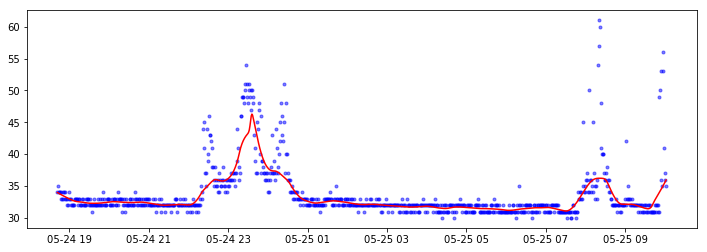

In [2]:
plt.figure(figsize=(12, 4))
plt.plot(cpu_data['timestamp'], cpu_data['temperature'], 'b.', alpha=0.5)

loess_smoothed = lowess(cpu_data['temperature'], cpu_data.index , frac = 0.05)
plt.plot(cpu_data['timestamp'], loess_smoothed[:, 1], 'r-')

plt.show() # easier for testing
# plt.savefig('cpu.svg') # for final submission

In [6]:
kalman_data = cpu_data[['temperature', 'cpu_percent']]
initial_state = kalman_data.iloc[0]
observation_stddev = 1
transition_stddev = 0.1
observation_covariance = [[observation_stddev ** 2, 0], [0, 2 ** 2]]
transition_covariance = [[transition_stddev ** 2, 0], [0, 80 ** 2]]